Opgave 2 – Temperatuur (30 pt)  
De temperatuur per dag hangt af van verschillende factoren.  
Toets met α=0,05 of de gemiddelde temperatuur per dag afhangt van de  
windrichting, de hoeveelheid bewolking en/of het zicht.   
- Als je concludeert dat alle groepen gemiddeld genomen even goed scoren, 
    geef dan een 95% betrouwbaarheidsinterval voor dit gemiddelde.
- Als je concludeert dat niet alle groepen gemiddeld genomen even 
    goed scoren, geef dan aan welke groepen significant beter of juist 
    slechter scoren dan andere groepen.

Houd er rekening mee dat sommige variabelen zó veel categorieën 
hebben dat er niet goed mee gerekend kan worden (omdat sommige 
groepen te klein worden) of dat er niets uit op te maken valt. Het kan dus 
nodig zijn om nieuwe variabelen aan te maken waarin (zinvolle) 
categorieën zijn samengevoegd

ANOVA?

In [4]:
# inladen bibliotheken en dataset
import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency 
import statsmodels.api as smapi 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(pd.read_csv('etmgeg2.csv'))

In [5]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
df.head()

,Datum,Jaar,Maand,Dag,Staatshoofd,WindrVec,WindrCat9,WindrCat5,Windsnelh,WindsnelhGem,...,ZichtMaxCat85,ZichtMaxCat5,ZichtMaxUur,BewolkingGem,VochtighGem,VochtighMax,VochtighMaxUur,VochtighMin,VochtighMinUur,Verdamping
0,27-4-1901,1901,4,27,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN
1,30-4-1901,1901,4,30,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84,NaN,NaN,NaN,NaN,NaN
2,31-8-1901,1901,8,31,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN
3,27-4-1902,1902,4,27,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN
4,30-4-1902,1902,4,30,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN


In [29]:
etmgeg['verschil_minTempUur_minZichtUur']= etmgeg['TempMaxUur']-etmgeg['ZichtMinUur']
etmgeg['verschil_maxTempUur_maxZichtUur']= etmgeg['TempMinUur']-etmgeg['ZichtMaxUur']
etmgeg.dropna(subset=['verschil_minTempUur_minZichtUur', 'verschil_maxTempUur_maxZichtUur'], inplace=True)
etmgeg['verschil_maxTempUur_maxZichtUur']

162    -5.0
163   -11.0
164    -3.0
165    -4.0
166    -9.0
       ... 
366    -4.0
367    -9.0
368    -9.0
369   -12.0
370   -12.0
Name: verschil_maxTempUur_maxZichtUur, Length: 209, dtype: float64

Groeperen van de kolom bewolkingGem

In [6]:
klein = []    #Twee lijsten maken voor de kolom BewolkingGem
middel = []

for value in df["BewolkingGem"]:
    if value in ['0/8', '1/8', '2/8', '3/8', '4/8']: #Kolom opsplitsen in 2 en de waarden toewijzen aan de juiste lijst
        klein.append(value)
    elif value in ['5/8', '6/8', '7/8', '8/8']:
        middel.append(value)
        
df.loc[df['BewolkingGem'].isin(klein), 'BewolkingGem'] = '0-4 /8' #De juiste groepen toewijzen aan de dataset
df.loc[df['BewolkingGem'].isin(middel), 'BewolkingGem'] = '5-8 /8'  

df

,Datum,Jaar,Maand,Dag,Staatshoofd,WindrVec,WindrCat9,WindrCat5,Windsnelh,WindsnelhGem,...,ZichtMaxCat85,ZichtMaxCat5,ZichtMaxUur,BewolkingGem,VochtighGem,VochtighMax,VochtighMaxUur,VochtighMin,VochtighMinUur,Verdamping
0,27-4-1901,1901,4,27,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN
1,30-4-1901,1901,4,30,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84,NaN,NaN,NaN,NaN,NaN
2,31-8-1901,1901,8,31,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN
3,27-4-1902,1902,4,27,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN
4,30-4-1902,1902,4,30,Wilhelmina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,27-4-2023,2023,4,27,Willem-Alexander,117.0,ZO,O,2.5,2.9,...,45-50 km,uitstekend,8.0,5-8 /8,61,98.0,2.0,39.0,13.0,3.0
367,30-4-2023,2023,4,30,Willem-Alexander,99.0,O,O,1.7,1.9,...,45-50 km,uitstekend,14.0,5-8 /8,73,98.0,2.0,45.0,16.0,3.2
368,31-8-2023,2023,8,31,Willem-Alexander,260.0,W,W,2.0,2.7,...,45-50 km,uitstekend,10.0,5-8 /8,78,97.0,6.0,49.0,13.0,3.1
369,27-4-2024,2024,4,27,Willem-Alexander,131.0,ZO,O,2.3,2.9,...,45-50 km,uitstekend,16.0,5-8 /8,80,93.0,2.0,61.0,16.0,1.9


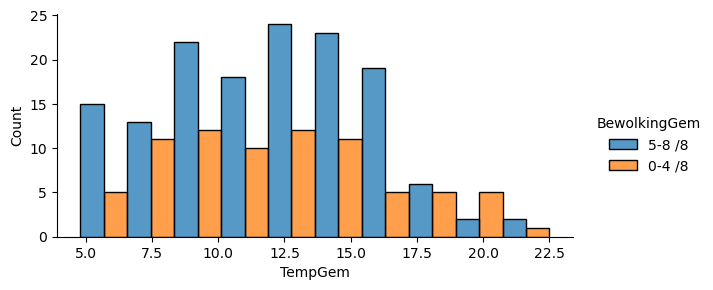

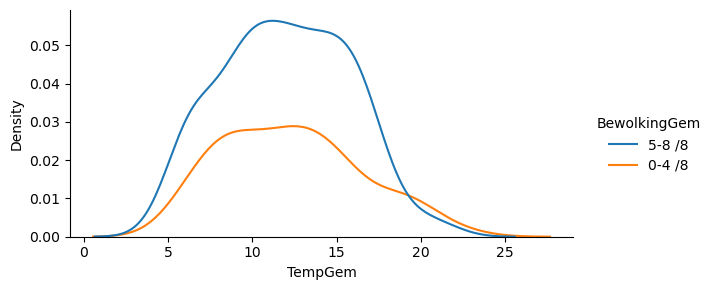

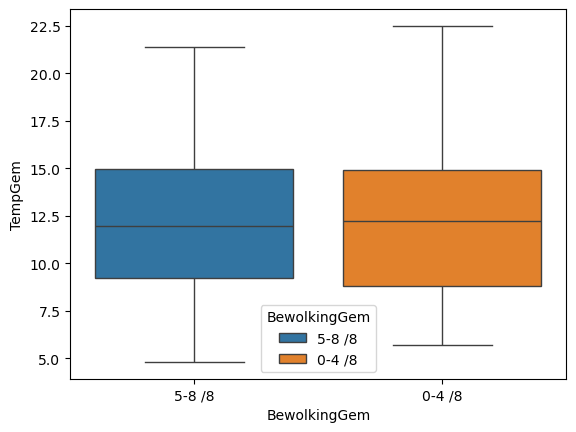

In [9]:
# visualisaties van de invloed van bewolkinggemiddelde op de temperatuurgemiddelde per dag
sns.displot(df,x='TempGem',hue='BewolkingGem',kind='hist',multiple='dodge',height=3,aspect=2) 
plt.show()
sns.displot(df,x='TempGem',hue='BewolkingGem',kind='kde',height=3,aspect=2)
plt.show()
sns.boxplot(data=df,x='BewolkingGem',y='TempGem',hue='BewolkingGem')
plt.show()

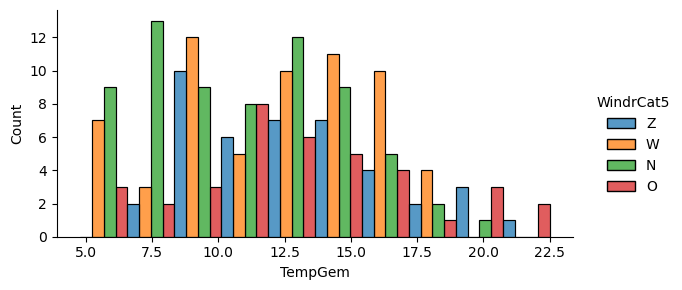

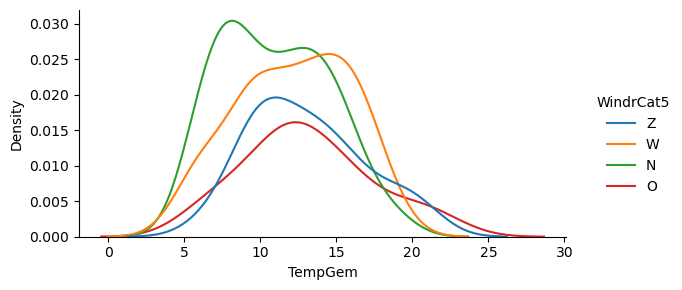

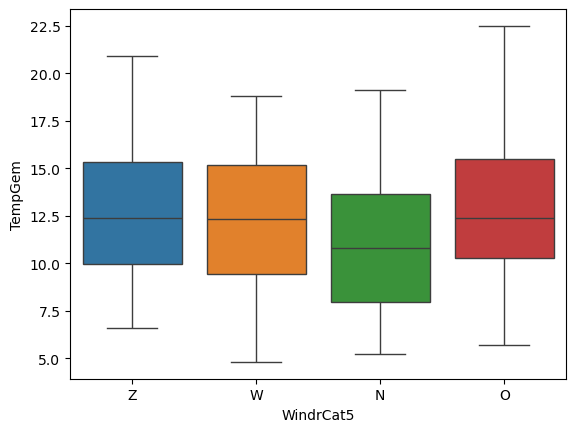

In [35]:
# visualisaties van de invloed van windrichting op de temperatuurgemiddelde per dag
sns.displot(etmgeg,x='TempGem',hue='WindrCat5',kind='hist',multiple='dodge',height=3,aspect=2) 
plt.show()
sns.displot(etmgeg,x='TempGem',hue='WindrCat5',kind='kde',height=3,aspect=2)
plt.show()
sns.boxplot(data=etmgeg,x='WindrCat5',y='TempGem',hue='WindrCat5')
plt.show()

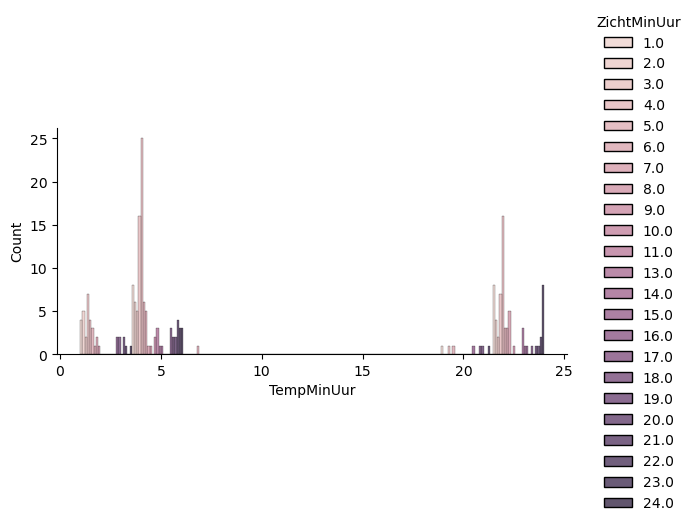

/tmp/ipykernel_2789311/2243241713.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(etmgeg,x='TempMinUur',hue='ZichtMinUur',kind='kde',height=3,aspect=2)


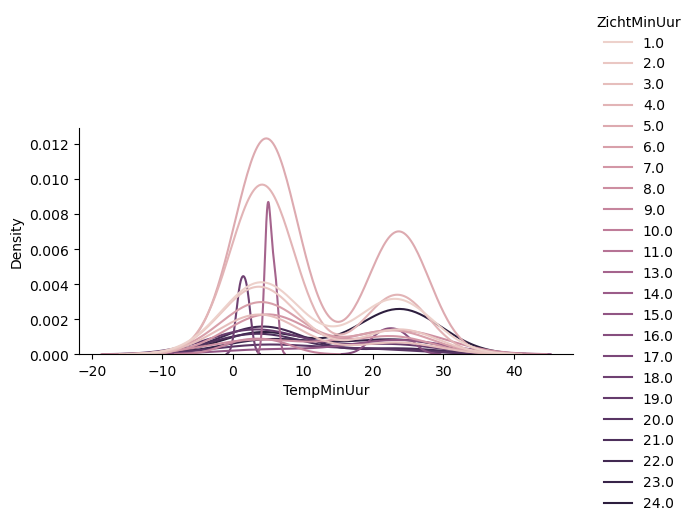

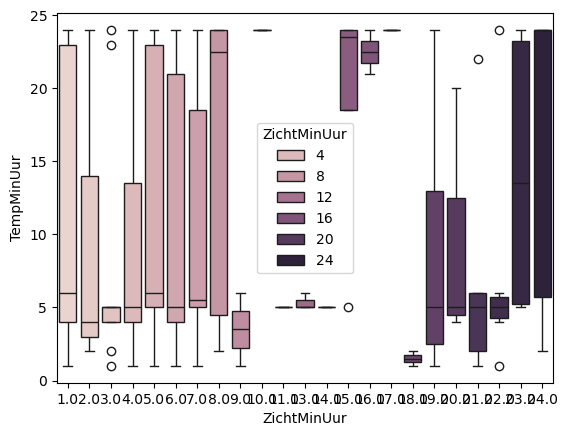

In [36]:
# visualisaties van de invloed van de minimale zicht per uur op de minimale temperatuur per uur per dag
sns.displot(etmgeg,x='TempMinUur',hue='ZichtMinUur',kind='hist',multiple='dodge',height=3,aspect=2) 
plt.show()
sns.displot(etmgeg,x='TempMinUur',hue='ZichtMinUur',kind='kde',height=3,aspect=2)
plt.show()
sns.boxplot(data=etmgeg,x='ZichtMinUur',y='TempMinUur',hue='ZichtMinUur')
plt.show()

In [ ]:
# visualisaties van de invloed van windrichting op de temperatuurgemiddelde per dag
sns.displot(etmgeg,x='TempGem',hue='WindrCat5',kind='hist',multiple='dodge',height=3,aspect=2) 
plt.show()
sns.displot(etmgeg,x='TempGem',hue='WindrCat5',kind='kde',height=3,aspect=2)
plt.show()
sns.boxplot(data=etmgeg,x='WindrCat5',y='TempGem',hue='WindrCat5')
plt.show()

If the p-value of an ANOVA is less than .05, then we reject the null hypothesis that each group mean is equal.

In this scenario, we can then perform post-hoc tests to determine exactly which groups differ from each other.

In [22]:
formula = "TempGem ~ C(WindrCat9 + BewolkingGem)"
lm = ols(formula, etmgeg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TempGem   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.351
Date:                Sun, 09 Jun 2024   Prob (F-statistic):             0.0733
Time:                        08:39:57   Log-Likelihood:                -568.11
No. Observations:                 221   AIC:                             1254.
Df Residuals:                     162   BIC:                             1455.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               11.3000      2.613      4.325      0.000       6.140      16.460
C(WindrCat9 + BewolkingGem)[T.N2/8]     -4.1000      3.695     -1.110      0.269     -11.397       3.197
C(WindrCat9 + BewolkingGem)[T.N3/8]     -1.2200      3.092     -0.395      0.694      -7.325       4.885
C(WindrCat9 + BewolkingGem)[T.N4/8]     -0.6667      2.889     -0.231      0.818      -6.371       5.037
C(WindrCat9 + BewolkingGem)[T.N5/8]     -2.4400      3.092     -0.789      0.431      -8.545       3.665
C(WindrCat9 + BewolkingGem)[T.N6/8]     -0.9000      2.921     -0.308      0.758      -6.669       4.869
C(WindrCat9 + BewolkingGem)[T.N7/8]      1.5500      3.695      0.419      0.675      -5.747       8.847
C(WindrCat9 + BewolkingGem)[T.N8/8]     -0.4429      2.963     -0.149      0.881      -6.293       5.408
C(WindrCat9 + BewolkingGem)[T.NO0/8]     7.8000      4.526      1.724      0.087      -1.137      16.737
C(WindrCat9 + BewolkingGem)[T.NO1/8]     0.6400      3.092      0.207      0.836      -5.465       6.745
C(WindrCat9 + BewolkingGem)[T.NO2/8]     2.7667      3.373      0.820      0.413      -3.894       9.428
C(WindrCat9 + BewolkingGem)[T.NO3/8]     1.3000      3.373      0.385      0.700      -5.361       7.961
C(WindrCat9 + BewolkingGem)[T.NO4/8]    -1.0000      3.695     -0.271      0.787      -8.297       6.297
C(WindrCat9 + BewolkingGem)[T.NO7/8]     0.2750      3.200      0.086      0.932      -6.044       6.594
C(WindrCat9 + BewolkingGem)[T.NO8/8]    -2.9333      3.373     -0.870      0.386      -9.594       3.728
C(WindrCat9 + BewolkingGem)[T.NW0/8]    -2.6000      4.526     -0.575      0.566     -11.537       6.337
C(WindrCat9 + BewolkingGem)[T.NW1/8]     5.7000      4.526      1.260      0.210      -3.237      14.637
C(WindrCat9 + BewolkingGem)[T.NW2/8]     4.2000      4.526      0.928      0.355      -4.737      13.137
C(WindrCat9 + BewolkingGem)[T.NW3/8]     1.5000      4.526      0.331      0.741      -7.437      10.437
C(WindrCat9 + BewolkingGem)[T.NW4/8]    -0.4500      3.017     -0.149      0.882      -6.408       5.508
C(WindrCat9 + BewolkingGem)[T.NW5/8]    -0.3000      2.889     -0.104      0.917      -6.004       5.404
C(WindrCat9 + BewolkingGem)[T.NW6/8]    -0.1600      3.092     -0.052      0.959      -6.265       5.945
C(WindrCat9 + BewolkingGem)[T.NW7/8]     0.2429      2.963      0.082      0.935      -5.608       6.093
C(WindrCat9 + BewolkingGem)[T.NW8/8]     1.1333      3.373      0.336      0.737      -5.528       7.794
C(WindrCat9 + BewolkingGem)[T.O0/8]      6.4000      3.373      1.897      0.060      -0.261      13.061
C(WindrCat9 + BewolkingGem)[T.O1/8]      5.4667      3.373      1.621      0.107      -1.194      12.128
C(WindrCat9 + BewolkingGem)[T.O2/8]   